<a href="https://colab.research.google.com/github/ashkanallahyari/metaphorical_brand_personality_elicitation/blob/main/MBPE_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Consider a brand that you wish to explore in depth in your mind. You likely have some thoughts and feelings related to this brand.**

Next, find 8 to 10 images that represent these thoughts and feelings.
> To delve deeper into your subconscious, try to avoid images directly related to the brand name or its products and services.

Then, upload them to your Google Drive or [**here**](https://drive.google.com/drive/folders/1OecxZM3jekJkFRVZAxelsucszLnpoHHZ?usp=share_link).

For testing purposes, you can use the images collected from an in-depth interview about the Redbull brand [**here**](https://drive.google.com/drive/folders/1PbEMxR_p84fahskhb-8ds702P84VTPYG?usp=share_link).

Afterwards, run the program and insert the image links.

> To obtain an image link, **right-click on an image** -> **click on Share** -> **Get link** -> set general access to **Anyone with the link** -> Copy link.

> Please ensure that the images you upload are in **JPG format**.

## **Location of Images**


In [1]:
# This function receive the Google Drive shared links of images one by one
def img_links_input():

  images_links = []
  img_link = input('Please paste the Google Drive link of your first image.\nMake sure you give the access permission to the images link: ')
  images_links.append(img_link)

  status = True
  while status == True:
    img_link = input('Please paste the Google Drive link of your next image (otherwise write N or NO): ')
    if img_link.lower() not in ['n', 'no']:
      images_links.append(img_link)
    else:
      status = False
      print("Let’s explore the brand personality in your mind.")

  return images_links

## **Please Insert Your Images Link Here One by One**

In [3]:
images_baselink = img_links_input()

Please paste the Google Drive link of your first image.
Make sure you give the access permission to the images link: https://drive.google.com/file/d/1x03VgX-aXp_nJUszBwwxC4ZHkvikyZ-e/view?usp=drive_link
Please paste the Google Drive link of your next image (otherwise write N or NO): n
Let’s explore the brand personality in your mind.


## **All Required Libraries and Models** (I takes about 3 minutes)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

%pip install gensim
import gensim

import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet

import PIL.Image as Image
import matplotlib.pylab as plt

import numpy as np
import regex as re

import gdown
import csv
from IPython.display import clear_output

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**Loading Pretrained Models**

*Executing this part of the code takes approximately 1 minute.*

> imagenet/efficientnet_v2_imagenet21k_b0/classification   |   GoogleNews-vectors-negative300

In [ ]:
# Using the functional API to construct the model
input_tensor = tf.keras.Input(shape=(224, 224, 3))

# Wrap KerasLayer in a Lambda layer to force eager execution
output_tensor = tf.keras.layers.Lambda(lambda x: hub.KerasLayer(
    "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_b0/classification/2",
    trainable=False  # Set trainable to False
)(x))(input_tensor)

model_img_cls = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)

> GoogleNews-vectors-negative300

In [ ]:
url = "https://drive.google.com/uc?id=1w0nuvKlKG6OmiP1CQh8H2K4WH1l7hhF-"
output = "GoogleNews-vectors-negative300.bin.gz"

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1w0nuvKlKG6OmiP1CQh8H2K4WH1l7hhF-
From (redirected): https://drive.google.com/uc?id=1w0nuvKlKG6OmiP1CQh8H2K4WH1l7hhF-&confirm=t&uuid=6147e870-3632-4889-b0c2-55f44767be2c
To: /content/GoogleNews-vectors-negative300.bin.gz
100%|██████████| 1.65G/1.65G [00:19<00:00, 85.5MB/s]


'GoogleNews-vectors-negative300.bin.gz'

In [ ]:
model_wv_gnews300 = gensim.models.KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300.bin.gz', binary=True)

## **Functions**

In [ ]:
# This function downloads and prepares list of acceptable adjectives, verbs and nouns, in the context of brand personality
# You can update these lists
def CommonWordsList (adjs_list_name='https://drive.google.com/uc?id=1c7D1e31md1FbsRhT0Y9mzNK7HV7l3WC4',
                     verbs_list_name='https://drive.google.com/uc?id=1AsRY9G49rhFMBK3OfcmuSNyAFBqSxYxP',
                     nouns_list_name='https://drive.google.com/uc?id=1mbbXhvRe2Q4z6OeBPjVKv8bdCGOFJzpB'):

  # Download and load applicable Adjectives in the context of brand personality
  gdown.download(adjs_list_name, 'adjs_list_name.txt', quiet=False)
  adjs_file = open('/content/adjs_list_name.txt').read().splitlines()

  # Download and load applicable Verbs in the context of brand personality
  gdown.download(verbs_list_name, 'verbs_list_name.txt', quiet=False)
  verbs_file = open('/content/verbs_list_name.txt').read().splitlines()

  # Download and load applicable Nouns in the context of brand personality
  gdown.download(nouns_list_name, 'nouns_list_name.txt', quiet=False)
  nouns_file = open('/content/nouns_list_name.txt').read().splitlines()

  # Combining ajds, verbs and nouns as a file
  common_words = adjs_file + verbs_file + nouns_file

  return adjs_file



# This function downloads and prepares the Jeniffer Aaker Brand Personality traits
def AakerList (jaaker_list_path='https://drive.google.com/uc?id=1BrCXW--hLwaPo5Io0cRw1mVyF1hrCBJc'):

  gdown.download(jaaker_list_path, 'aaker_list_name.csv', quiet=False)

  with open('/content/aaker_list_name.csv', 'r', encoding="utf-8-sig") as f:
      file = csv.reader(f)
      aaker_personality_dimentions = list(file)

  return aaker_personality_dimentions



# This function downloads and prepares the file of humans' primary personality traits
def PrimaryPersonalityTraits (trait_list_name='https://drive.google.com/uc?id=1r3l6Z1F3prOfMZC6YShNZPpH8kS1IJEC'):

  gdown.download(trait_list_name, 'Primary_Personality_Traits.txt', quiet=False)
  trait_file = open('/content/Primary_Personality_Traits.txt').read().splitlines()

  return trait_file



# This function finds the name of the uploaded images, resizes them and converts them to array
def ImgToArray (img_link, input_size=(224, 224)):

  img_resize = Image.open(img_link).resize(input_size)
  img_array = np.array(img_resize) / 255.0

  return img_array



# This function download imagenet labeles
def Imglabeldownload (imagenet_labels_21k = 'https://drive.google.com/uc?id=1NwOh8ZkhFwCi2kRLr4I-YcxiOfyxJaTp'):
  gdown.download(imagenet_labels_21k, 'Imagenet_21k_labels.txt', quiet=False)



# This function predicts the lable of one image
def ImgLabelPrediction (img_array):

  result = model_img_cls.predict(img_array[np.newaxis])
  predicted_class = tf.math.argmax(result[0], axis=-1)
  labels_path = open('/content/Imagenet_21k_labels.txt').read().splitlines()
  img_label = np.array(labels_path) # Directly use labels_path

  return img_label[predicted_class]




# This function prepares image lables and expands them using syn lemmas
def ImgLabelPrepared (imge_label):

  # Using stop words
  stops = set(stopwords.words('english'))

  temp_list = []
  for i in imge_label.split(', '):
    temp_list.append(i.lower())
    for j in i.split('_'):
      if j not in stops:
        temp_list.append(j.lower())
  temp_list = list(set(temp_list))

  img_label_list = []
  for word in temp_list:
    for syn in wordnet.synsets(word):
      for lemma in syn.lemmas():
        img_label_list.append(lemma.name())
  img_label_list = list(set(img_label_list))

  return img_label_list



# This function exmapds the image lables with most similar words
def SimilarityFromList (vocab_list,
                        common_w_list,
                        model=model_wv_gnews300,
                        w_similarity_rate= 0.3):

  w_silimarity = []
  for vocab in vocab_list:
    for item in common_w_list:
      try:
        sim = model.similarity(vocab.lower(), item.lower())
        w_silimarity.append([item.lower(), sim])
      except:
        continue

  w_silimarity.sort(key= lambda x: x[1], reverse=True)
  w_silimarity_selected = [i for i in w_silimarity if i[1] >= w_similarity_rate]

  return w_silimarity_selected



# this function creates a augmented list of all image tags and expandeds words
def AaugmentedWordsList (img_tags , similar_words):

  for item in similar_words:
    img_tags.append(item[0])

  return img_tags



# This function counts the number of images, creates a subplot with two columns and shows the images
def ImgShow (img_arrays, title='Uploaded Images'):

  n_of_pics = len(img_arrays)
  if n_of_pics % 2 == 0:
    n_of_rows = n_of_pics // 2
  else:
    n_of_rows = (n_of_pics // 2) + 1


  fig, axs = plt.subplots(n_of_rows, 2, figsize=(10, n_of_rows*3))
  fig.suptitle(title)

  for i in range(n_of_pics):
    axs.flat[i].imshow(img_arrays[i][0])
    #axs.flat[i].set_title(img_arrays[i][1])
    axs.flat[i].axis('off')
  plt.show()



# This function prepares a unique set of words (remove duplications)
def PoolOfWords (img_arrays):

  word_pool = []
  for item in img_arrays:
    for word in item[1]:
      word_pool.append(word)

  return list(set(word_pool))



# This fucntion converts image tags into primary personality traits based on their similarity
def PrTraitSim (vocab_list,
                prtrait_list,
                model = model_wv_gnews300,
                tr_similarity_rate = 0.3):

  w_silimarity = []
  for vocab in vocab_list:
    for trait in prtrait_list:
      try:
        sim = model.similarity(vocab, trait.lower())
        w_silimarity.append([trait, sim])
      except:
        continue

  tr_silimarity_list = []
  for trait in w_silimarity:
    if trait[1] >= tr_similarity_rate:
      tr_silimarity_list.append(trait[0])

  return tr_silimarity_list



# This function creates a word cloud
def WordCloud (trait_list):


  from wordcloud import WordCloud

  if len(trait_list) > 0:
    text = (" ").join(trait_list)
  else:
    text = "There_Is_No_Association"

  word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()



# This function creates a dictionary of the Jennifer Aaker's brand personality traits (Detailed) and their distances with augmented image tags
def AakerDetailedSim (vocab_list,
                      aaker_personality_list,
                      model=model_wv_gnews300,
                      ak_similarity_rate= 0.3):

  w_silimarity = []
  for vocab in vocab_list:
    for bp_item in aaker_personality_list:
      try:
        sim = model.similarity(vocab, bp_item[2].lower())
        w_silimarity.append([bp_item[2], sim])
      except:
        continue

  w_silimarity_dic = {}
  for bp_dimesions in w_silimarity:
    if bp_dimesions[1] >= ak_similarity_rate:
      if bp_dimesions[0] not in w_silimarity_dic.keys():
        w_silimarity_dic[bp_dimesions[0]] = [1]
      else:
        w_silimarity_dic[bp_dimesions[0]].append(1)
    else:
      if bp_dimesions[0] not in w_silimarity_dic.keys():
        w_silimarity_dic[bp_dimesions[0]] = [0]
      else:
        w_silimarity_dic[bp_dimesions[0]].append(0)

  keys_list = list(w_silimarity_dic.keys())
  for dimension in keys_list:
    w_silimarity_dic[dimension] = round(np.sum(w_silimarity_dic[dimension])/len(vocab_list), ndigits=3)

  return w_silimarity_dic



# This function creates a dictionary of the Jennifer Aaker's brand personality traits (main) and their distances with augmented image tags
def AakerSim (aaker_detailed_dic,
               aaker_personality_list):

  temp_dic = {}
  for item in aaker_personality_list:
    temp_dic[item[2]] = item[0]

  aaker_dic = {}
  for bp_dimension in list(aaker_detailed_dic.keys()):
    aaker_dim = temp_dic[bp_dimension]
    if aaker_dim not in list(aaker_dic.keys()):
      aaker_dic[aaker_dim] = [aaker_detailed_dic[bp_dimension]]
    else:
      aaker_dic[aaker_dim].append(aaker_detailed_dic[bp_dimension])

  keys_list = list(aaker_dic.keys())
  for dimension in keys_list:
    aaker_dic[dimension] = round(np.mean(aaker_dic[dimension]), ndigits=3)

  return aaker_dic



# This function depicts the Jenifer Aaker's personality chart
def personality_plot(dic):

  dimensions = list(dic.keys())
  values = list(dic.values())

  fig = plt.figure(figsize = (10, 5))
  plt.bar(dimensions, values, color ='black' ,width = 0.4)
  plt.xticks(rotation = 90)
  plt.xlabel("J. Aaker Brand Personality Dimensions")
  plt.ylabel("Percent")
  plt.show()



# This function reveive a string containing google drive link and create downloadable link
def link_provider(gdrive_link):
  file_id = gdrive_link.split('/')[5]
  download_link = f'https://drive.google.com/uc?id={file_id}'
  gdown.download(download_link, f'/content/{file_id}.jpg', quiet=False)

  return file_id

In [ ]:
def main_function(images_baselink=images_baselink,
                  input_size=(224, 224),
                  min_of_associations = 5,
                  max_of_associations = 15,
                  w_similarity_rate= 0.3,
                  tr_similarity_rate=0.3,
                  ak_similarity_rate= 0.3,
                  tuning_tolerance = 0.05):

  common_w_list = CommonWordsList()
  aaker_personality_dimentions = AakerList()
  primary_personality_traits = PrimaryPersonalityTraits()
  Imglabeldownload()
  clear_output(wait=True)


  imgarray_label_list = []
  for image in images_baselink:
    file_id = link_provider(image)
    img_array = ImgToArray(f'/content/{file_id}.jpg', input_size)
    img_label = ImgLabelPrediction(img_array)
    img_tags = ImgLabelPrepared(img_label)
    w_silimarity_selected = SimilarityFromList(img_tags, common_w_list, w_similarity_rate=w_similarity_rate)
    augmented_labels = AaugmentedWordsList (img_tags , w_silimarity_selected)
    imgarray_label_list.append([img_array, augmented_labels])

  clear_output(wait=True)

  ImgShow(imgarray_label_list, title='Uploaded Images')
  word_pool = PoolOfWords(imgarray_label_list)

  pr_trait_list = PrTraitSim(word_pool, primary_personality_traits, tr_similarity_rate=tr_similarity_rate)
  while len(set(pr_trait_list)) < min_of_associations:
    tr_similarity_rate -= tuning_tolerance
    pr_trait_list = PrTraitSim(word_pool, primary_personality_traits, tr_similarity_rate=tr_similarity_rate)

  while len(set(pr_trait_list)) > max_of_associations:
    tr_similarity_rate += tuning_tolerance
    pr_trait_list = PrTraitSim(word_pool, primary_personality_traits, tr_similarity_rate=tr_similarity_rate)

  WordCloud(pr_trait_list)
  print ("trait Similarity Rate: {:0.2f}".format(tr_similarity_rate))
  print ("Number of Traits: {}".format(len(set(pr_trait_list))))

  brand_personality_detailed = AakerDetailedSim(pr_trait_list, aaker_personality_dimentions, ak_similarity_rate=ak_similarity_rate)
  personality_plot(brand_personality_detailed)

  #return word_pool

## **Results**

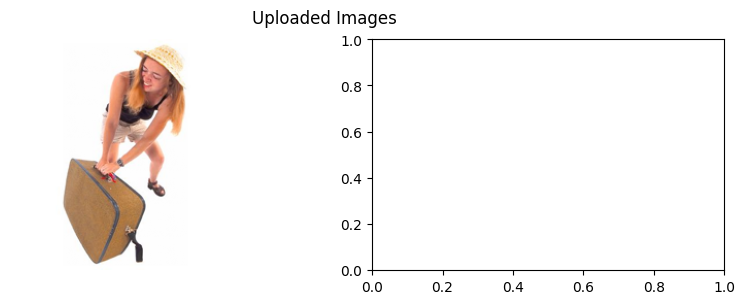

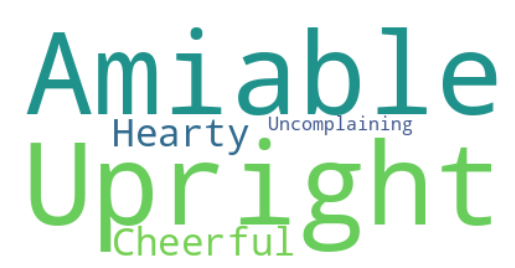

trait Similarity Rate: 0.33
Number of Traits: 5


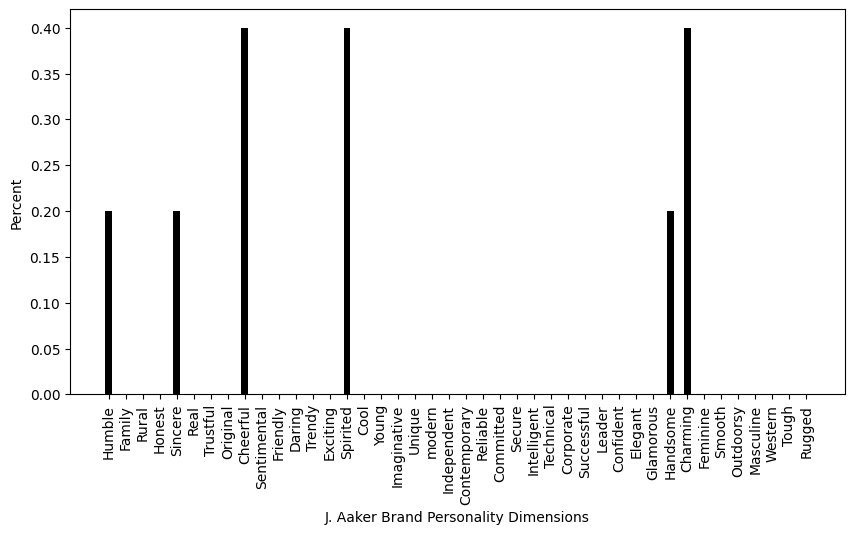

In [ ]:
main_function(w_similarity_rate=0.5,
              tr_similarity_rate=0.5,
              ak_similarity_rate=0.3,
              min_of_associations = 5,
              max_of_associations = 10,
              tuning_tolerance = 0.01)